<a href="https://colab.research.google.com/github/aarna97pandey/MIDASS-IIITD-Summer-Internship-Task/blob/master/CV_Problem/CV_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Connecting the notebook to the Drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Import the gdrive
from google.colab import drive

In [0]:
#Libraries for preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import csv

In [4]:
#Importing the train set and labels
train_setX=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi Assignment/Vision_task_dataset_public/train_image.pkl', 'rb') as files:
      train_setX=pickle.load(files)

train_setY=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi Assignment/Vision_task_dataset_public/train_label.pkl', 'rb') as files:
    train_setY = pickle.load(files)
 
  
Img = len(train_setX)     # no images in train set
print(len(train_setY))    # no of labels
print(len(train_setX[0])) # heightXWidth  
print(Img)   


8000
784
8000


In [0]:
#No of row and columns
nR = 28
nC = 28

In [6]:
#Total no of bytes
nBytesTotal = Img*nR*nC*1  #since each pixel data is 1 byte
print(nBytesTotal)


6272000


In [7]:
#Converting the image in numpy array
train_setX = np.array(train_setX)/255
train_image_array= train_setX.reshape(Img,nR, nC)
train_image_array= np.array(train_image_array)
print(train_image_array.shape)

(8000, 28, 28)


In [8]:
#Converting the labels in numpy array
train_label_array = np.array(train_setY)
print(train_label_array)
print(len(train_label_array))

[0 0 0 ... 6 6 6]
8000


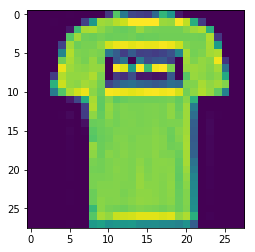

In [9]:
#Plotting the images
x = train_image_array[0]
plt.imshow(x)

In [10]:
#Importing the test images
test_setX=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi Assignment/Vision_task_dataset_public/test_image.pkl', 'rb') as files:
      test_setX=pickle.load(files)
print(len(test_setX))   # no images in test set    
print(len(test_setX[0]))

test_setX = np.array(test_setX)/255
test_image_array = test_setX.reshape(2000, nR, nC)
test_image_array = np.array(test_image_array)

2000
784


# Machine Learning Training Model


In [11]:
'''
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_setX,train_label_array, test_size=0.20, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_valid)


# compute classification accuracy for the logistic regression model
from sklearn import metrics

print(metrics.accuracy_score(y_valid, y_pred))
'''


#Not using the machine learning model as the accuracy calculated is quiet less
#Moving toward the Neural network model
#Building the Convolutional Neural Network Model

0.7825


#  Building the training model  # CNN

In [12]:
# Importing Libraries for training dataset
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
#Training specification
batch_size = 200
epochs = 20
num_classes = 4

In [14]:
#Converting the labels in array using MultiLabelBinerizer
train_label_array = train_label_array.reshape(len(train_setY),1)

from sklearn.preprocessing import MultiLabelBinarizer
multiBinerizer = MultiLabelBinarizer()
train_label_array=multiBinerizer.fit_transform(train_label_array)
print(train_label_array)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [15]:
#Train image and label renaming
x_train = train_image_array
y_train = train_label_array
print(x_train.shape)
print(y_train.shape)

(8000, 28, 28)
(8000, 4)


In [0]:
x_test = test_image_array

In [0]:
x_train = x_train.reshape(8000,28,28,1)


In [0]:
x_test = x_test.reshape(2000,28,28,1)

In [19]:
#validating the dimensions of train set
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print('Y train: ', y_train.shape)


x_train shape: (8000, 28, 28, 1)
8000 train samples
Y train:  (8000, 4)


In [20]:
# validating the dimensions of test set
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')

x_test shape: (2000, 28, 28, 1)
2000 test samples


Convolutional Neural Network Model Train



In [0]:
# building the model
classifier = Sequential()


In [0]:

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))


In [0]:
classifier.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [24]:
#Fit the classifier to the train set
classifier.fit(x = x_train, y = y_train, 
          validation_split=0.1, 
          batch_size = batch_size, 
          verbose=2, 
          epochs=epochs,
          shuffle= True)  # allowing shuffle as our image are least random



Instructions for updating:
Use tf.cast instead.
Train on 7200 samples, validate on 800 samples
Epoch 1/20
 - 7s - loss: 1.1262 - acc: 0.5306 - val_loss: 1.8188 - val_acc: 0.0000e+00
Epoch 2/20
 - 7s - loss: 0.7558 - acc: 0.7078 - val_loss: 1.3709 - val_acc: 0.0387
Epoch 3/20
 - 7s - loss: 0.6824 - acc: 0.7344 - val_loss: 1.7420 - val_acc: 0.0125
Epoch 4/20
 - 7s - loss: 0.6447 - acc: 0.7453 - val_loss: 1.1279 - val_acc: 0.1162
Epoch 5/20
 - 7s - loss: 0.6187 - acc: 0.7525 - val_loss: 1.2304 - val_acc: 0.0763
Epoch 6/20
 - 7s - loss: 0.5844 - acc: 0.7643 - val_loss: 1.5114 - val_acc: 0.0638
Epoch 7/20
 - 7s - loss: 0.5504 - acc: 0.7853 - val_loss: 1.3627 - val_acc: 0.1625
Epoch 8/20
 - 7s - loss: 0.5223 - acc: 0.8004 - val_loss: 0.8408 - val_acc: 0.6012
Epoch 9/20
 - 8s - loss: 0.5000 - acc: 0.8081 - val_loss: 0.8072 - val_acc: 0.5975
Epoch 10/20
 - 7s - loss: 0.4715 - acc: 0.8183 - val_loss: 0.8108 - val_acc: 0.5750
Epoch 11/20
 - 7s - loss: 0.4491 - acc: 0.8272 - val_loss: 1.4489 - va

In [25]:
#Making the predictions
predictions = classifier.predict(x_test)
print(predictions)

[[9.72948134e-01 7.23346748e-05 3.64535052e-04 2.66149640e-02]
 [6.22417748e-01 1.01744924e-02 1.44910797e-01 2.22496957e-01]
 [9.73303616e-01 8.71787022e-04 8.11433303e-04 2.50131730e-02]
 ...
 [2.12250367e-01 2.33927201e-02 2.56024033e-01 5.08332849e-01]
 [1.03863713e-03 1.53251225e-02 6.09158596e-04 9.83027160e-01]
 [1.29224244e-03 5.72836101e-01 1.43127777e-02 4.11558837e-01]]


In [26]:
#Converting the prediction matrix into binary form
for arr in predictions:
  max_ = 0
  for i in range(1,4):
    if(arr[max_]<arr[i]):
      max_ = i
  for i in range(0,4):
    if(max_ == i):
      arr[i] = int(1)
    else:
      arr[i] = int(0)
    
print(predictions)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [0]:
#Inverse Binerization
predictions = multiBinerizer.inverse_transform(predictions)

In [0]:
#Converting the prediction list of integers to string so that it can be easily written in CSV file
predictions = [str(x[0]) for x in predictions]

In [29]:
#Check the prediction list of strings
print(predictions)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '3', '0', '6', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '2', '0', '0', '0', '6', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '2', '0', '0', '0', '0', '0', '3', '3', '0', '0', '0', '0', '0', '0', '0', '0', '3', '6', '3', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '3', '0', '0', '0', '0', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '3', '0', '0', '0', '6', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '0', '0', '0', '0', '0', '0', '0', '2', '0', '0', '0', '0', '3', '0', '0', '0', '0', '0', '0', '0',

In [0]:
#Creating the CSV and wrting the test image and their predicted class
with open('/content/gdrive/My Drive/Lakshmi_Pandey.csv',"w") as outfile:
    outfile.write("image_index"+","+"class")
    outfile.write("\n")
    for i in range(len(predictions)):
        outfile.write(str(i)+","+predictions[i])
        outfile.write("\n")

In [0]:
# The calculate accuracy in the train set is 86.72%
#Thanks for IIIT Delhi for this opportunity